In [1]:
from ipynb.fs.full.tool_functions import *

/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


# Main

In [2]:
# Download Data
df_beha = pd.read_csv('../../../data/Behavioral/AllData.csv')

df_psd_cluster = pd.read_csv("../../../data/EEG/RestingEEG_PSD_Cluster.csv")
df_spectro_cluster = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Cluster.csv")
df_microstate = pd.read_csv("../../../data/EEG/RestingEEG_Microstates.csv")

print(df_beha.shape)
print(df_psd_cluster.shape)
print(df_spectro_cluster.shape)
print(df_microstate.shape)

/home/tristan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (66,68,80,81,82,83,84,95,96,97,98,99,110,111,112,113,114,125,126,127,128,129,140,141,142,144,155,156,157,159,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1

(2096, 7042)
(1485, 2041)
(1485, 301)
(1108, 26)


In [3]:
# Extract relevant info from the Behavioral data 
y_labels = df_beha[["Patient_ID", "Age", "DX_01_Cat"]]
y_labels_healthy = y_labels[y_labels["DX_01_Cat"].str.contains("No Diagnosis Given") == True]

y_labels = y_labels[["Patient_ID", "Age"]]
y_labels_healthy = y_labels_healthy[["Patient_ID", "Age"]]

print(y_labels.shape)
print(y_labels_healthy.shape)

(2096, 2)
(513, 2)


In [4]:
df_psd_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_spectro_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_microstate.rename(columns={'id': 'Patient_ID'}, inplace=True)

df_psd_cluster_label = pd.merge(y_labels_healthy, df_psd_cluster, on='Patient_ID')
print("Only healthy people, resulting length of psd cluster:")
print(len(df_psd_cluster_label))

Only healthy people, resulting length of psd cluster:
174


In [5]:
# Split into train/test
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df_psd_cluster_label.iloc[:,2:], \
                                                       df_psd_cluster_label['Age'], test_size=0.2)
X_train.index = np.arange(len(X_train))
X_test.index = np.arange(len(X_test))
y_train.index = np.arange(len(y_train))
y_test.index = np.arange(len(y_test))

print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(35, 2040)
(35,)
(139, 2040)
(139,)


In [6]:
# Replace NaN by median 
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)

X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(35, 2040)
(35,)
(139, 2040)
(139,)


In [7]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(35, 2040)
(35,)
(139, 2040)
(139,)


In [8]:
# Drop outlier samples
X_train, y_train = drop_outliers_samples_isolation_forest(X_train, y_train)

print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(35, 2040)
(35,)
(129, 2040)
(129,)


Best Alpha =  0.2782559402207124
# of coef before =  2040
# of coef after =  15
(35, 15)
(35,)
(129, 15)
(129,)


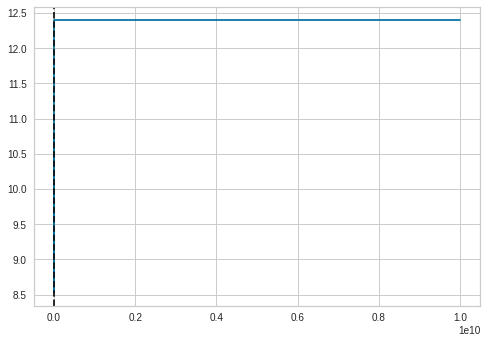

In [9]:
# Feature extraction

# X_train, X_val = feature_selection_with_f_regressor_and_random_forest(150, 100, X_train, X_val, y_train)
X_train , X_test = feature_extraction_lasso(X_train , X_test, y_train)
# X_train , X_val = feature_select_by_correlation(X_train, y_train, X_val, 200)

print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

In [10]:
# Gaussian process fitting
clf = fit_gaussian_process_with_grid_search(X_train, y_train)
    
#     parameters = {
#         'kernel': [10 * RationalQuadratic() * DotProduct(sigma_0 = 1) + 2 * ConstantKernel() + WhiteKernel(noise_level=0.5)
#                   ]}

/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best parameters for Gaussian Process: {'kernel': 3.16**2 * RationalQuadratic(alpha=1, length_scale=1) * DotProduct(sigma_0=1) + 1.41**2 * 1**2 + WhiteKernel(noise_level=0.5)}


In [11]:
# Make predictions
y_pred = clf.predict(X_test)
mean_squared_error(y_test, y_pred)

6.628686623884609